In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

In [2]:
# Load and read city_data.csv and ride_data.csv

city_data_csv = Path("data/city_data.csv")
ride_data_csv = Path("data/ride_data.csv")

city_df = pd.read_csv(city_data_csv)
ride_df = pd.read_csv(ride_data_csv)

# Join the data into a single dataset and display
merged_df = pd.merge(city_df, ride_df, how='outer')
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
# Obtain the x,y coordinates and set size in correlations to drivers for urban cities
urban_df = merged_df.loc[(merged_df['type']=='Urban')]
urban_ride_count = urban_df.groupby('city').count()['ride_id']
urban_avg_fare = urban_df.groupby('city').mean()['fare']
urban_size_driver = (urban_df.groupby('city').mean()['driver_count'])*10

In [4]:
# Obtain the x,y coordinates and set size in correlations to drivers for suburban cities
suburban_df = merged_df.loc[(merged_df['type']=='Suburban')]
suburban_ride_count = suburban_df.groupby('city').count()['ride_id']
suburban_avg_fare = suburban_df.groupby('city').mean()['fare']
suburban_size_driver = (suburban_df.groupby('city').mean()['driver_count'])*10

In [5]:
# Obtain the x,y coordinates and set size in correlations to drivers for rural cities
rural_df = merged_df.loc[(merged_df['type']=='Rural')]
rural_ride_count = rural_df.groupby('city').count()['ride_id']
rural_avg_fare = rural_df.groupby('city').mean()['fare']
rural_size_driver = (rural_df.groupby('city').mean()['driver_count'])*10

## Bubble Plot of Ride Sharing Data

In [6]:
# Set the figure size using rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6

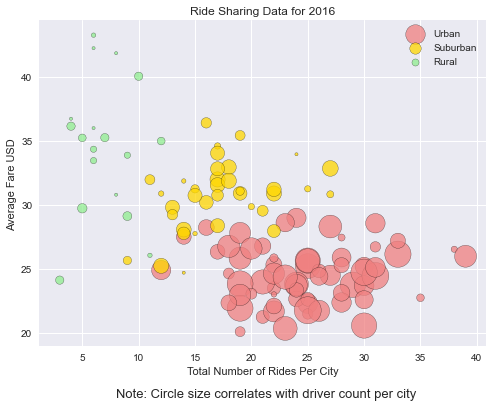

In [7]:
# Build the scatter plot for each city types
plt.scatter(
    urban_ride_count,
    urban_avg_fare,
    s = urban_size_driver,
    facecolor = 'lightcoral',
    edgecolor = 'black',
    label = 'Urban',
    alpha=0.75
)
plt.scatter(
    suburban_ride_count,
    suburban_avg_fare,
    s = suburban_size_driver,
    facecolor = 'gold',
    edgecolor = 'black',
    label = 'Suburban',
    alpha=0.75
)
plt.scatter(
    rural_ride_count,
    rural_avg_fare,
    s = rural_size_driver,
    facecolor = 'lightgreen',
    edgecolor = 'black',
    label = 'Rural',
    alpha=0.75
)

#Incorporate other graph properties
plt.title("Ride Sharing Data for 2016")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare USD")

# Create a Legend 
plt.legend(loc='best')

# Incorporate a text label regarding circle size
plt.text(8,15,"Note: Circle size correlates with driver count per city", fontsize = 13)
plt.savefig("Images/bubblechart.png");

## Total Fares by City Type

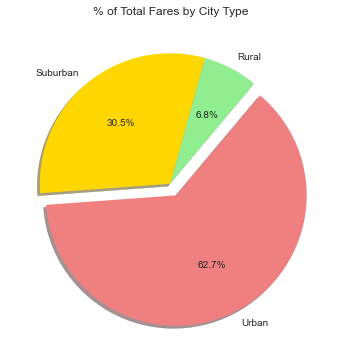

In [8]:
# Calculate Type percent 

fare_by_type = merged_df.groupby('type').sum()['fare']
total_fare = merged_df.sum()['fare']
type_percents = (fare_by_type / total_fare) * 100

colors = ['lightgreen', 'gold', 'lightcoral']
explode = [0,0,0.1]

plt.pie(
    type_percents,
    startangle = 50,
    shadow = True,
    labels = type_percents.index,
    explode = explode,
    autopct='%1.1f%%', colors=colors
)
plt.title("% of Total Fares by City Type")
plt.savefig("Images/faresbytype.png");

## Total Rides by City Type

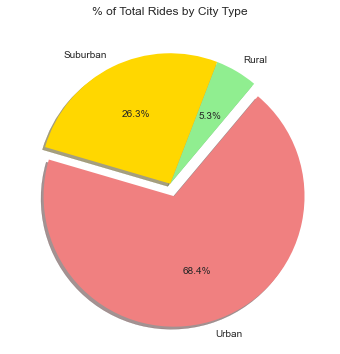

In [9]:
# Calculate Ride Percents

ride_by_type = merged_df.groupby('type').count()['ride_id']
total_rides = merged_df.count()['ride_id']
ride_percents = ride_by_type / total_rides * 100

plt.pie(
    ride_percents,
    colors = colors,
    labels = ride_percents.index,
    startangle = 50,
    autopct = '%1.1f%%',
    explode = explode,
    shadow=True
)
plt.title("% of Total Rides by City Type")
plt.savefig("Images/ridesbytype.png");

## Total Drivers by City Type

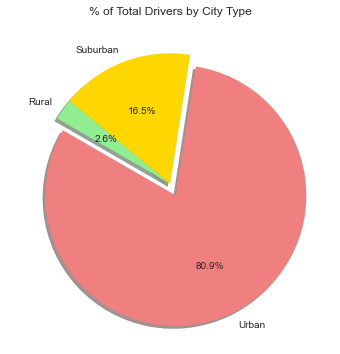

In [10]:
# Calculate the Driver Percents

urban_drivers = urban_df.groupby('city').mean()['driver_count'].sum()
suburban_drivers = suburban_df.groupby('city').mean()['driver_count'].sum()
rural_drivers = rural_df.groupby('city').mean()['driver_count'].sum()
total_drivers = merged_df.groupby('city').mean()['driver_count'].sum()

drivers_by_type = pd.Series((urban_drivers,suburban_drivers,rural_drivers), index=['Urban', 'Suburban','Rural'])
drivers_percent = drivers_by_type / total_drivers * 100

plt.pie(
    drivers_percent,
    colors = ['lightcoral', 'gold','lightgreen'],
    explode = [0.1,0,0],
    shadow = True,
    labels = drivers_percent.index,
    startangle = 150,
    autopct = '%1.1f%%'
)
plt.title('% of Total Drivers by City Type')
plt.savefig("Images/driversbytype.png");